# Regresion logistica

Sabemos que la regresion lineal es una funcion que esta denotada por y = wx + b donde 
w es la pendiente y b es los pasos que da x en el eje, ahora sabiendo esto la regression
logistica que ya es una regresion de clasificacion usa esta misma ecuacion para 
clasificar los datos en este caso y(x)= b + w1x1 + w2x2 donde x son las caracteristicas

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

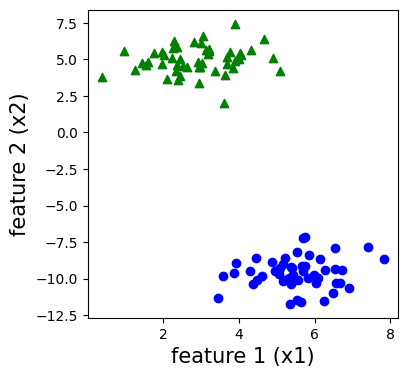

In [6]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=10)

plt.figure(figsize=(4,4))
for target, color , marker in zip(range(2),['b','g'],['o','^']):
    plt.scatter(X[y==target,0],X[y==target,1],c=color,marker=marker,
                label='class '+format(target))
    plt.xlabel('feature 1 (x1)',fontsize=15)
    plt.ylabel('feature 2 (x2)',fontsize=15)
    plt.grid()

plt.show()

Necesitamos en estos casos convertir las señales deuna forma binaria, recordemos que 
machine learning es una tecnica que usa numero y aprende de ellos, en este caso 
tenemos attributos que son la clase 0 y la clase 1 entonces para esto tenemosque 
convertir la señales en binario

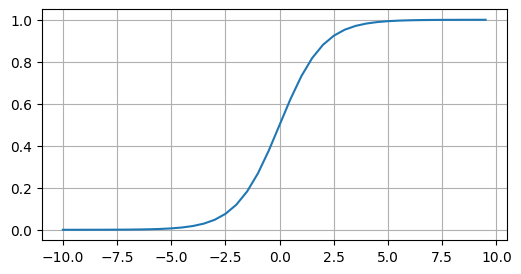

In [7]:
# Funcion sigmoid usada para covertir las etiquetas en binario (clase 0 o clase 1)
import numpy as np

def sigmoid(t):
    return 1/(1+np.exp(-t))

t = np.arange(-10,10,0.5)
y = sigmoid(t)
plt.figure(figsize=(6,3))
plt.plot(t,y)
plt.grid()
plt.show()

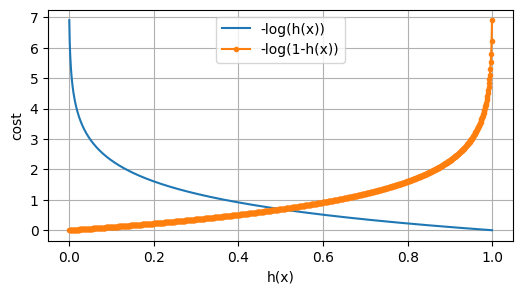

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def minus_log(t):
    return -np.log(t)

t = np.arange(0.001,1,0.001)
y1 = minus_log(t)
y2 = minus_log(1-t)

plt.figure(figsize=(6,3))
plt.plot(t,y1,label='-log(h(x))')
plt.plot(t,y2,marker='.', label='-log(1-h(x))')
plt.xlabel('h(x)'); plt.ylabel('cost')
plt.legend()
plt.grid()
plt.show()

## Aplicacion del gradiente 

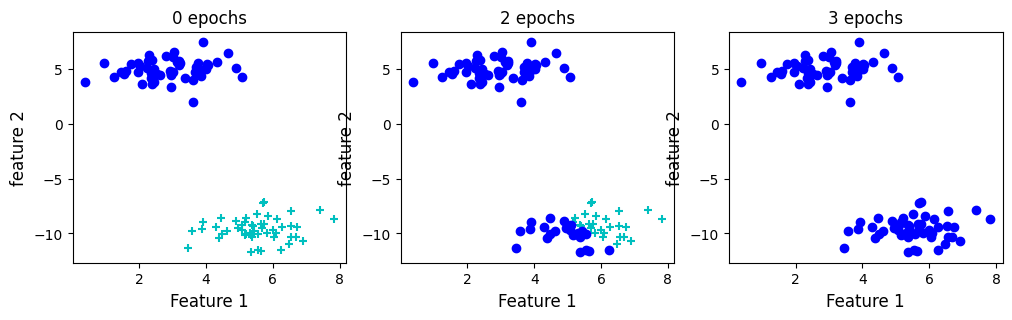

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Nos ayuda a convertir en binarion los valores para clasificar
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Predecimos los valores que se nos pase por x para y
def prediction(theta,x):
    return theta[0]*theta[1]*x[0]+theta[2]*x[1]


# indicamos que clasificacion seria 0 o 1 (feature 1 or feature 2)
def label(theta,x):
    return int(round(sigmoid(prediction(theta,x))))

def gradient(theta,X,y,j):
    sum = 0
    for i in range(X.shape[0]):
        if j == 0:
            X_aux = 1
        else:
            X_aux = X[i,j-1]
        sum += (sigmoid(prediction(theta,X[i])) - y[i])*X_aux
    return sum/X.shape[0]

def fit(theta,X,y,epochs):
    for e in range(epochs):
        for j in range(len(theta)):
            theta[j] -= gradient(theta,X,y,j)
    return theta


X,y = make_blobs(n_samples=100, n_features=2,centers=2, random_state=10)

fig, axs = plt.subplots(1,3,figsize=(12,3))
theta_0 = [8.7,9.1,6.4]

for i,ax in zip([0,2,3],axs):
    theta = fit(theta_0,X,y,i)
    label_y = []
    for row in range(len(y)):
        label_y.append(label(theta,X[row]))
    
    # las caracteristicas incorrecta
    ax.scatter(X[y!=label_y,0],X[y!=label_y,1], c='c',marker='+')

    # las caracteristicas correctas 
    ax.scatter(X[y==label_y,0],X[y==label_y,1],c='b',marker='o')
    ax.set_title(format(i)+' epochs')
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('feature 2', fontsize=12)

plt.show()


**Conclusion:** Viendo los graficos de arriba se logran observar que cuando no realizamos intentos no podemos clasificar de manera correcta los valores, una vez que incrementamos 
los intentos en el modelo, este va aprendiendo cual seria el valor deseado para esa 
clasificacion